In [2]:
from qiskit import QuantumCircuit 

In [25]:
n = 4 
qc =QuantumCircuit(n,1)
qc.x(-1)
qc.barrier()
for i in range(n):
    qc.h(i)
qc.barrier()
# building oracle 
qc.cx(0,-1),
qc.cx(1,-1)
qc.cx(2,-1)
# qc.cx()
# qc.h(0), qc.h(2)
qc.barrier()
for i in range(n-1):
    qc.h(i)
qc.measure(0,0)



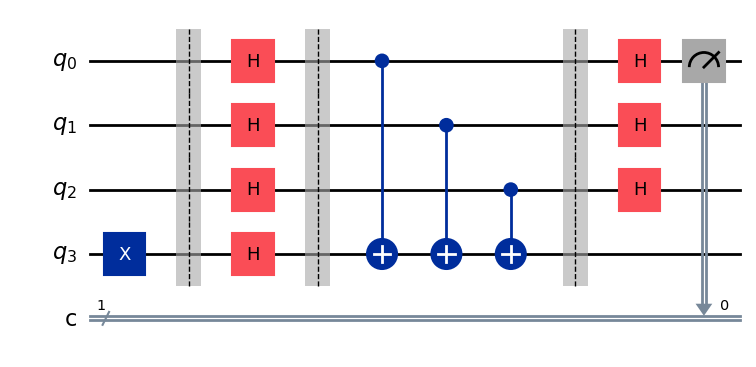

In [26]:
qc.draw('mpl', fold=-1)

In [27]:
# shot-based measurement # 
from qiskit_aer import AerSimulator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import Session, SamplerV2 as Sampler

aer_sim = AerSimulator()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=3)
isa_qc = pm.run(qc)

shots = 10000
with Session(backend=aer_sim) as session:
    sampler = Sampler(aer_sim)
    result = sampler.run([isa_qc], shots= shots).result()
expval = []
counts = result[0].data.c.get_counts()
p_0, p_1 = 0, 0
for key in counts.keys():
    if str(key) == '0': 
        p_0 += counts[key]/shots
    else: 
        p_1 += counts[key]/shots

if p_0 == 1:
    print('The oracle is a constant function')
elif p_0 == 0:
    print('The oracle is a balanced function')
else: 
    print('The oracle is neither constant nor balanced function -> violate the assumption')

base_primitive._run:WARNING:2025-11-11 17:46:14,787: Even though a session/batch context manager is open this job will run in job mode because the sampler primitive was initialized outside the context manager. Move the sampler initialization inside the context manager to run in a session/batch.


The oracle is a balanced function


In [28]:
# package version # 
import qiskit
import qiskit_ibm_runtime
import qiskit_aer
print(qiskit.__version__)
print(qiskit_ibm_runtime.__version__)
print(qiskit_aer.__version__)

2.0.0
0.38.0
0.17.0
